# Resuls of ResNet for DoubleScape @ 4 bar - Sophronia data

## Data

Take a look at what my labelled data looks like

In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
sys.path.append('/home/usc/ie/mpm/NEXT_graphs')

from NEXT_graphNN.utils.read_tensorboard import load_tensorboard_df
from sklearn.metrics import roc_curve, auc

from invisible_cities.io.dst_io import load_dst
sys.path.append(os.getenv('HOME') + '/data_labelling/')

from utils.plotting_utils import plot_3d_hits, plot_3d_vox, plot_cloud_voxels_and_hits, plot_cloud_voxels_and_hits_discrete

sys.path.append(os.getenv('HOME') + '/NEXT_SPARSECONVNET/')

In [2]:
test_file = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/4bar/trains/soph_class/dataset_4bar_PORT_1a_label_scn_test.h5'

events_info = pd.read_hdf(test_file, 'DATASET/EventsInfo')
events_voxel = pd.read_hdf(test_file, 'DATASET/Voxels')
bins_info = pd.read_hdf(test_file, 'DATASET/BinsInfo')

In [3]:
path = events_info.pathname.unique()[0]
df = pd.Series(dtype = 'float32')
for i, name in enumerate(events_info.basename.unique()):
    df = pd.concat([df, pd.read_hdf(path + '/' + name, 'MC/hits').groupby('event_id').energy.sum()])
df.index.name = 'event_id'
events_info = events_info.merge(df.rename('mc_energy'), on = 'event_id')

In [4]:
(events_info.total_energy - events_info.mc_energy).max()

0.1288087996577958

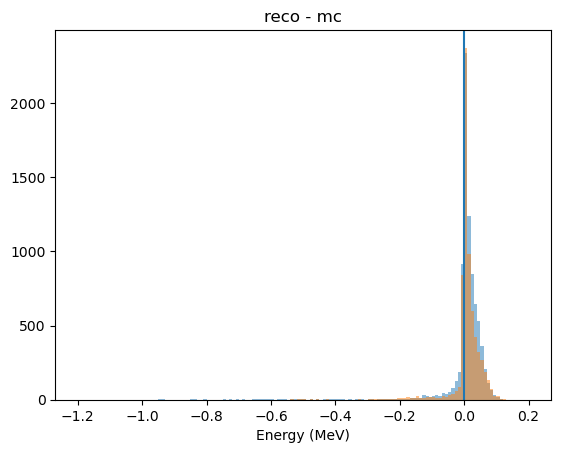

In [5]:
a = plt.hist(events_info[events_info.binclass == 0].total_energy - events_info[events_info.binclass == 0].mc_energy, 140, (-1.2, 0.2), alpha = 0.5)
plt.hist(events_info[events_info.binclass == 1].total_energy - events_info[events_info.binclass == 1].mc_energy, 140, (-1.2, 0.2), alpha = 0.5)
plt.axvline(0)
plt.title('reco - mc')
# plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.show()

In [6]:
sum((events_info.total_energy - events_info.mc_energy) > 0) / len(events_info)

0.785942279558452

In [7]:
sum((events_info.total_energy - events_info.mc_energy) < 0)

3219

### Probar a cambiar esto en el dataloader??

In [8]:
hits = events_voxel[events_voxel.dataset_id == 5]
np.unique(hits['binclass'])

array([1])

In [9]:
np.array([events_info.iloc[5].binclass])

array([1])

In [10]:
# % of events of pair production
events_info.binclass.sum() / len(events_info)

0.45145631067961167

In [11]:
1 - events_info.binclass.sum() / len(events_info)

0.5485436893203883

In [12]:
data_info = events_info.copy()
data_info['nvox'] = events_voxel.groupby('dataset_id').count().binclass

In [13]:
data_info

,event_id,binclass,dataset_id,pathname,basename,label_pathname,label_basename,total_energy,mc_energy,nvox
0,81000000,0,0,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_1351_208Tl.h5,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_label_1351_208Tl.h5,1.542916,1.533745,383
1,81000001,0,1,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_1351_208Tl.h5,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_label_1351_208Tl.h5,1.724690,1.665832,378
2,81000002,1,2,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_1351_208Tl.h5,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_label_1351_208Tl.h5,1.516794,1.507099,267
3,81000003,1,3,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_1351_208Tl.h5,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_label_1351_208Tl.h5,1.655073,1.592507,362
4,81000004,0,4,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_1351_208Tl.h5,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_label_1351_208Tl.h5,1.505256,1.502504,296
...,...,...,...,...,...,...,...,...,...,...
15033,89940108,0,15033,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_1500_208Tl.h5,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_label_1500_208Tl.h5,1.657503,1.617615,388
15034,89940109,0,15034,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_1500_208Tl.h5,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_label_1500_208Tl.h5,1.656534,1.635505,369
15035,89940110,0,15035,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_1500_208Tl.h5,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_label_1500_208Tl.h5,1.578318,1.523769,375
15036,89940111,1,15036,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_1500_208Tl.h5,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,sophronia_label_1500_208Tl.h5,1.594299,1.592507,383


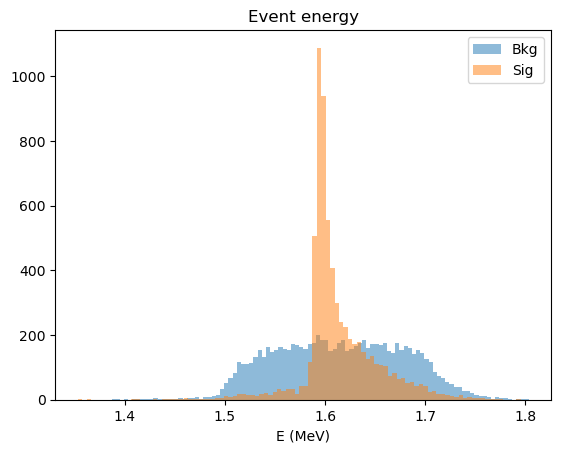

In [14]:
plt.hist(data_info[data_info.binclass == 0].total_energy, 100, alpha = 0.5, label = 'Bkg')
plt.hist(data_info[data_info.binclass == 1].total_energy, 100, alpha = 0.5, label = 'Sig')
# plt.xlim((1.5, 1.7))

plt.title('Event energy')
plt.xlabel('E (MeV)')
# plt.yscale('log')
plt.legend()
plt.show()

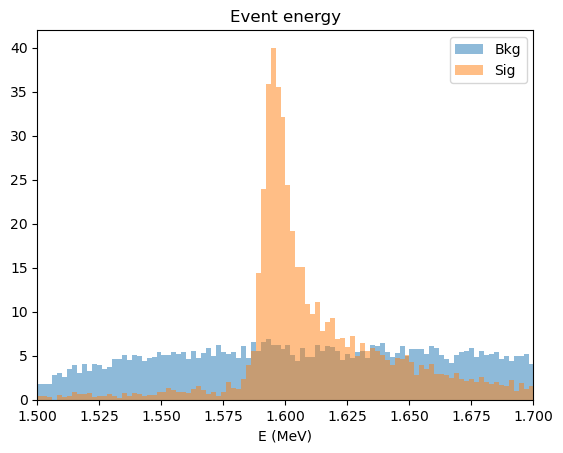

In [15]:
plt.hist(data_info[data_info.binclass == 0].total_energy, 100, (1.5, 1.7), density = True, alpha = 0.5, label = 'Bkg')
plt.hist(data_info[data_info.binclass == 1].total_energy, 100, (1.5, 1.7), density = True, alpha = 0.5, label = 'Sig')
plt.xlim((1.5, 1.7))
plt.title('Event energy')
plt.xlabel('E (MeV)')
# plt.yscale('log')
plt.legend()
plt.show()

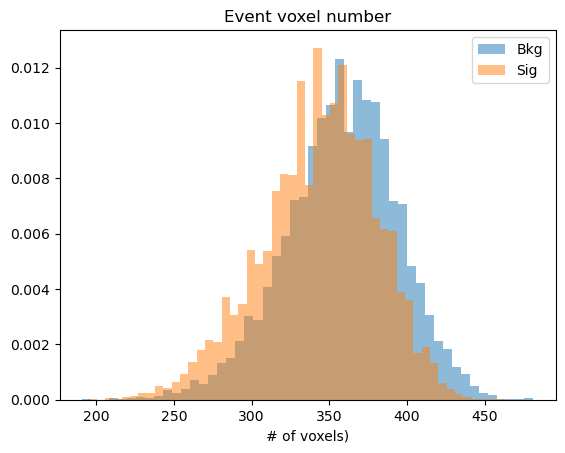

In [16]:
plt.hist(data_info[data_info.binclass == 0].nvox, 50, density = True, alpha = 0.5, label = 'Bkg')
plt.hist(data_info[data_info.binclass == 1].nvox, 50, density = True, alpha = 0.5, label = 'Sig')
plt.title('Event voxel number')
plt.xlabel('# of voxels)')
# plt.yscale('log')
plt.legend()
plt.show()

## Train evolution

In [2]:
def plot_tb_results(file, title, figsize = (8, 7)):

    if isinstance(file, str):
        tb = load_tensorboard_df(file)
    if isinstance(file, list):
        tbs = [load_tensorboard_df(f) for f in file]
        for i in range(1, len(tbs)):
            tbs[i]['step'] += tbs[i-1]['step'].max() + 1
            tb = pd.concat(tbs, ignore_index=True)

    plt.figure(figsize = figsize)
    plt.suptitle(title)
    plt.subplot(2, 2, (1, 2))
    plt.plot(tb.step, tb.loss_train, label = 'Train')
    plt.plot(tb.step, tb.loss_valid, label = 'Valid')
    plt.grid()
    plt.yscale('log')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 2, (3, 4))
    plt.plot(tb.step, tb.acc_train, label = 'Train')
    plt.plot(tb.step, tb.acc_valid, label = 'Valid')
    plt.grid()
    # plt.yscale('log')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    return tb

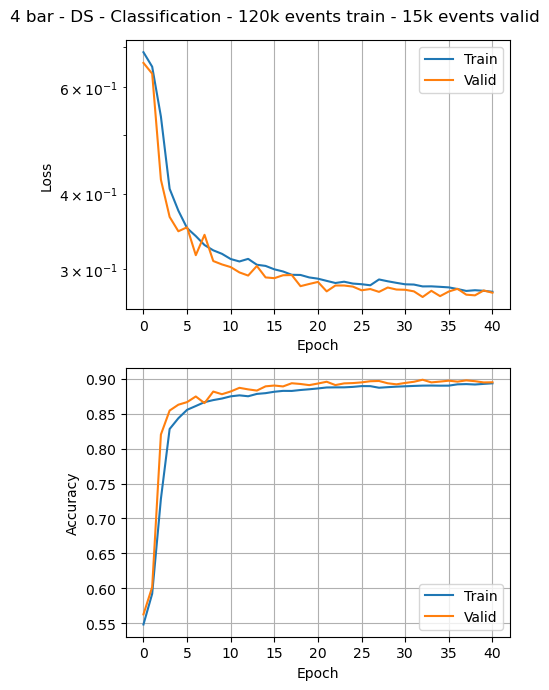

In [3]:
tb_10kevs_file = ['/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/4bar/trains/soph_class/train_B/prev_logs/events.out.tfevents.1742893829.c207-14.2784026.0',
                    '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/4bar/trains/soph_class/train_B/prev_logs/events.out.tfevents.1743180883.c210-1.2440734.0', 
                    '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/4bar/trains/soph_class/train_B/prev_logs/events.out.tfevents.1743988868.c210-16.2480682.0']

tb_10kevs = plot_tb_results(tb_10kevs_file, '4 bar - DS - Classification - 120k events train - 15k events valid', figsize=(5, 7))

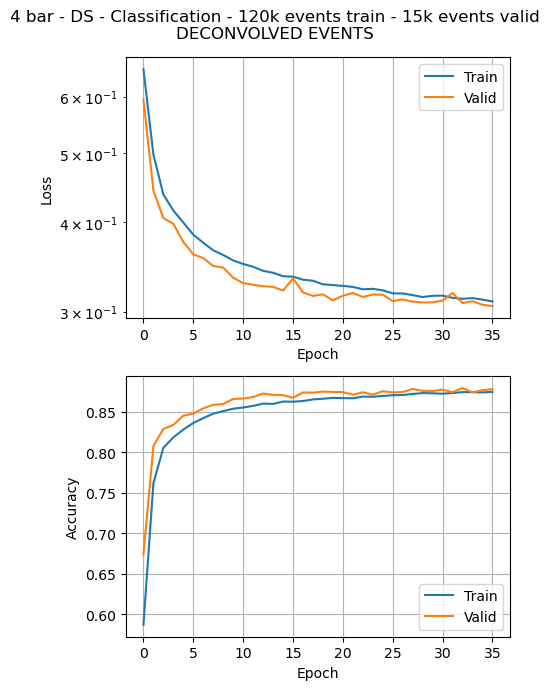

In [4]:
tb_deco_file = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/4bar/trains/soph_class/train_B_deco/logs/events.out.tfevents.1751031955.c207-16.2969891.0'

tb_deco = plot_tb_results(tb_deco_file, '4 bar - DS - Classification - 120k events train - 15k events valid\nDECONVOLVED EVENTS', figsize=(5, 7))

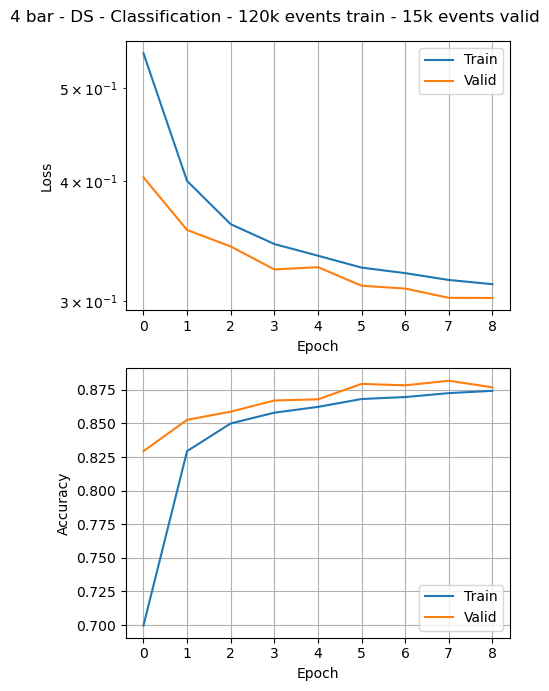

In [5]:
tb_10kevs_file = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/4bar/trains/soph_class/train_C/logs/events.out.tfevents.1742833372.c208-10.1990599.0'
tb_10kevs = plot_tb_results(tb_10kevs_file, '4 bar - DS - Classification - 120k events train - 15k events valid', figsize=(5, 7))

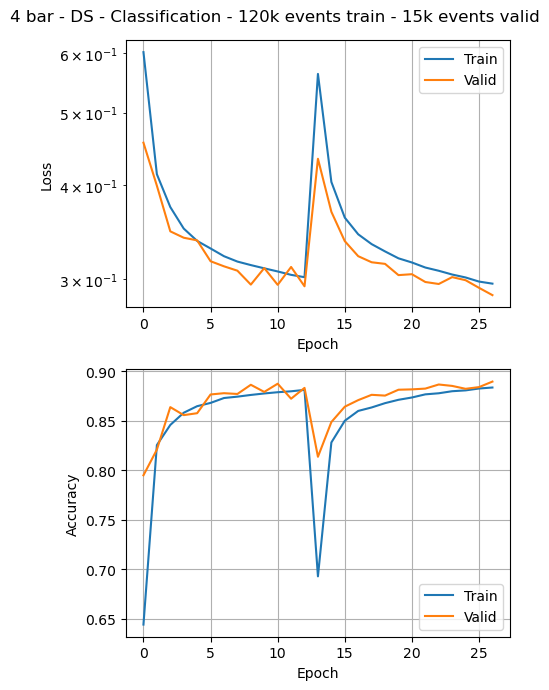

In [6]:
tb_10kevs_file = ['/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/4bar/trains/soph_class/train_D/prev_logs/events.out.tfevents.1743012375.c210-9.2242377.0',
                  '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/4bar/trains/soph_class/train_D/logs/events.out.tfevents.1743989663.c209-1.3950224.0']
tb_10kevs = plot_tb_results(tb_10kevs_file, '4 bar - DS - Classification - 120k events train - 15k events valid', figsize=(5, 7))

# Results

In [ ]:
pred_file = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/4bar/trains/soph_class/{}/pred_file.h5'
# pred_A = pd.read_hdf(pred_file.format('train_A'), 'DATASET/EventPred')
pred_B = pd.read_hdf(pred_file.format('train_B'), 'DATASET/EventPred')

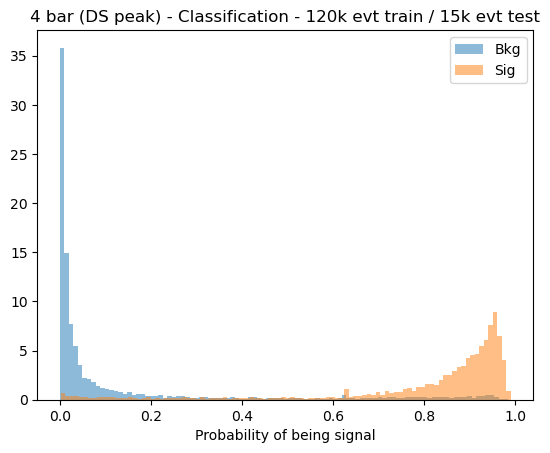

In [8]:
plt.hist(pred_B[pred_B.label == 0].class_1, 100, density=True, alpha = 0.5, label = 'Bkg')
plt.hist(pred_B[pred_B.label == 1].class_1, 100, density=True, alpha = 0.5, label = 'Sig')
plt.xlabel('Probability of being signal')
plt.title('4 bar (DS peak) - Classification - 120k evt train / 15k evt test')
# plt.yscale('log')
plt.legend()
plt.show()

Entiendo que cuando no sabe que hacer, lo clasifica como 0.8??? O es que la señal la toma como 0.8, y todo lo que hay por debajo como bkg??

In [9]:
import sys
from sklearn.metrics import confusion_matrix, roc_curve, auc

def accuracy(true, pred):
    """
        Intersection over union is a metric for semantic segmentation.
        It returns a IoU value for each class of our input tensors/arrays.
    """
    eps = sys.float_info.epsilon

    conf_matrix = confusion_matrix(true, pred)
    acc = (sum(np.diagonal(conf_matrix)) + eps) / (sum(sum(conf_matrix)) + eps)

    return acc

In [11]:
thresholds = np.linspace(0, 1, 101)
acc = []
for th in thresholds:
    acc_ = accuracy(pred_B.label.values, (pred_B.class_1 > th).astype('int').values)
    acc.append(acc_)


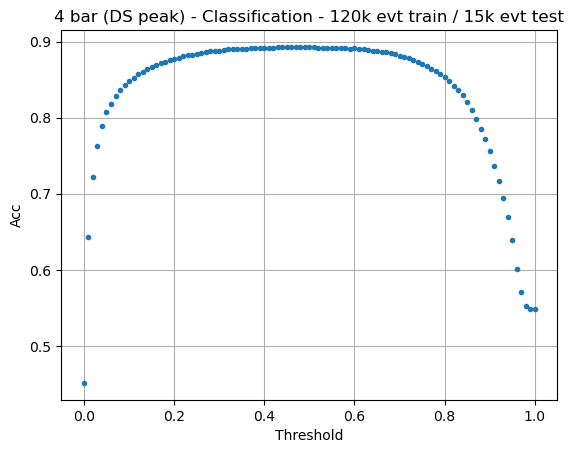

In [12]:
plt.plot(thresholds, np.array(acc), '.')
plt.xlabel('Threshold')
plt.ylabel('Acc')
plt.title('4 bar (DS peak) - Classification - 120k evt train / 15k evt test')
plt.grid()
plt.show()

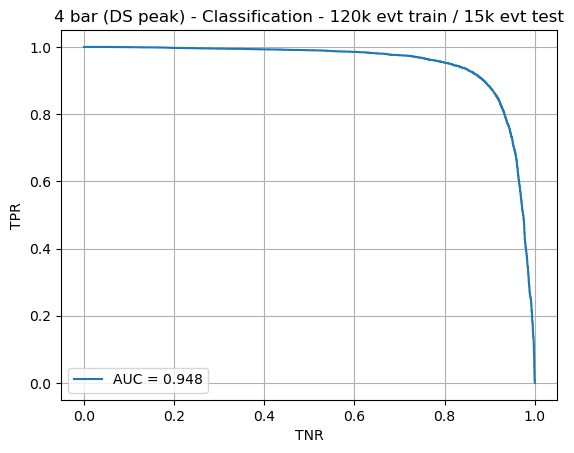

In [13]:
fpr, tpr, thresholds = roc_curve(pred_B.label.values, pred_B.class_1.values)
roc_auc = auc(fpr, tpr)

plt.plot(1 - fpr, tpr, label = 'AUC = {:.3f}'.format(roc_auc))
plt.xlabel('TNR')
plt.ylabel('TPR')
plt.title('4 bar (DS peak) - Classification - 120k evt train / 15k evt test')
plt.legend()
plt.grid()
plt.show()

In [14]:
#Quito los 0 de FPR para evitar conflictos
nonzero = ~(fpr == 0)
nonzero_tpr = tpr[nonzero]
nonzero_fpr = fpr[nonzero]
nonzero_thr = thresholds[nonzero]

#Calculo FOM
fom = nonzero_tpr/np.sqrt(nonzero_fpr)

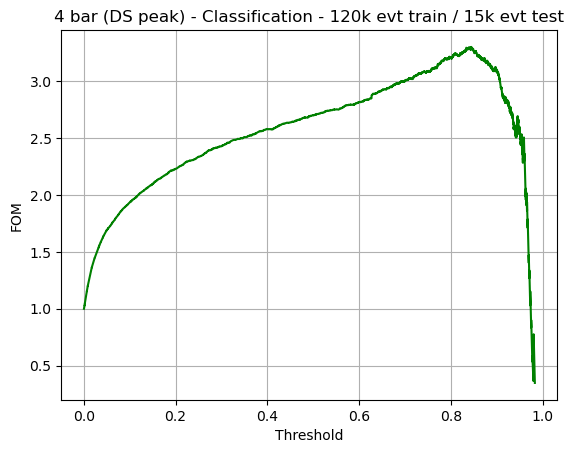

In [16]:
plt.plot(nonzero_thr, fom, 'g-')
plt.xlabel('Threshold')
plt.ylabel('FOM')
plt.title('4 bar (DS peak) - Classification - 120k evt train / 15k evt test')
# plt.legend()
plt.grid()
plt.show()